## 导入数据

In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('beijing_wangjing_125.txt')
df = df.sort_values(['id', 'daily_10min']).reset_index(drop=True)
df.head()

,daily_10min,id,real_speed,free_speed,idx
0,201909010000,137,39.138,41.579,1.062
1,201909010010,137,40.465,41.579,1.028
2,201909010020,137,37.904,41.559,1.096
3,201909010030,137,38.134,41.548,1.090
4,201909010040,137,41.336,41.579,1.006


In [14]:
df.groupby('id').count()

,daily_10min,real_speed,free_speed,idx
id,,,,
137,4320,4320,4320,4320
1143,4320,4320,4320,4320
1191,4320,4320,4320,4320
1199,4320,4320,4320,4320
1200,4320,4320,4320,4320
...,...,...,...,...
1014301,4033,4033,4033,4033
1014304,3591,3591,3591,3591
1014307,4148,4148,4148,4148


In [15]:
df = df[df.id==137]

train_size = round(len(df) * 0.8)

train_df = df[:train_size]
test_df = df[train_size:]

## 方法一：History Average

In [16]:
train_df['hour_min'] = train_df['daily_10min'].apply(lambda x: str(x)[-4:])
ha = train_df.groupby('hour_min').real_speed.mean()
ha = ha.reset_index()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25300\2038983374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['hour_min'] = train_df['daily_10min'].apply(lambda x: str(x)[-4:])


In [17]:
ha

,hour_min,real_speed
0,0000,39.286375
1,0010,39.645167
2,0020,39.308875
3,0030,39.439500
4,0040,39.927875
...,...,...
139,2310,38.736958
140,2320,39.281583
141,2330,39.583667
142,2340,39.191583


<AxesSubplot:xlabel='hour_min'>

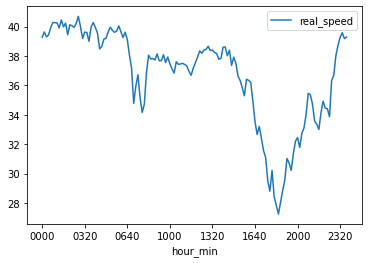

In [18]:
ha.plot(x='hour_min', y='real_speed')

In [19]:
test_df['hour_min'] = test_df['daily_10min'].apply(lambda x: str(x)[-4:])
test_df = test_df.merge(ha, 'inner', on='hour_min')
test_df = test_df.rename(columns={'real_speed_y':'predict', 'real_speed_x': 'real_speed'})

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25300\3581326336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['hour_min'] = test_df['daily_10min'].apply(lambda x: str(x)[-4:])


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(test_df['real_speed'], test_df['predict']))
print("RMSE:", mean_squared_error(test_df['real_speed'], test_df['predict'], squared=False))

MAE: 1.7735031828703707
RMSE: 2.4929885043018185


## 方法二 Moving Average

In [22]:
data_x = []
data_y = []

window_size = 4
i = 0
while i+window_size < len(test_df):
    data_x.append(test_df.real_speed[i:i+window_size].values)
    data_y.append(test_df.real_speed[i+window_size])
    i += 1

predicts = np.mean(data_x, axis=1)
print("MAE:", mean_absolute_error(data_y, predicts))
print("RMSE:", mean_squared_error(data_y, predicts, squared=False))

MAE: 1.6538718023255812
RMSE: 2.528043632778052


In [23]:
def ma_test(window_size):
    data_x = []
    data_y = []
    i = 0
    while i+window_size < len(test_df):
        data_x.append(test_df.real_speed[i:i+window_size].values)
        data_y.append(test_df.real_speed[i+window_size])
        i += 1

    predicts = np.mean(data_x, axis=1)
    mae = mean_absolute_error(data_y, predicts)
    rmse = mean_squared_error(data_y, predicts, squared=False)
    return mae, rmse

for window_size in range(1, 21):
    print(f'window_size:{window_size}')
    mae, rmse = ma_test(window_size)
    print(f'MAE:{mae}, RMSE:{rmse}')

window_size:1
MAE:2.173573580533024, RMSE:3.37607880771093
window_size:2
MAE:1.7826658932714616, RMSE:2.6980174350894033
window_size:3
MAE:1.7391742160278747, RMSE:2.6415160576061814
window_size:4
MAE:1.6538718023255812, RMSE:2.528043632778052
window_size:5
MAE:1.6496018626309663, RMSE:2.5239043562019043
window_size:6
MAE:1.5275001942501942, RMSE:2.3380122571232786
window_size:7
MAE:1.5476179363227207, RMSE:2.384560971397861
window_size:8
MAE:1.530267815420561, RMSE:2.3471877811063857
window_size:9
MAE:1.5587797270955166, RMSE:2.3790106787733656
window_size:10
MAE:1.553280444964871, RMSE:2.3591231565733404
window_size:11
MAE:1.568841415325589, RMSE:2.3858283273330603
window_size:12
MAE:1.5442002151799685, RMSE:2.3417912095153888
window_size:13
MAE:1.555258428997559, RMSE:2.362453174243603
window_size:14
MAE:1.5483665546218488, RMSE:2.3418045118157544
window_size:15
MAE:1.569325559481743, RMSE:2.367581751400954
window_size:16
MAE:1.561659861438679, RMSE:2.352559050443227
window_size:17
